## Исследование данных о российском кинопрокате



**Вам нужно изучить рынок российского кинопроката и выявить текущие тренды.
Уделите внимание фильмам, которые получили государственную поддержку.
Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.**

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [71]:
data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')

data_movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [72]:
data_movies.describe()

,refundable_support,nonrefundable_support,budget
count,3.320000e+02,3.320000e+02,3.320000e+02
mean,1.186446e+07,4.898099e+07,1.272297e+08
std,2.491656e+07,5.998012e+07,1.885883e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07
50%,0.000000e+00,3.000000e+07,6.864992e+07
75%,1.500000e+07,4.037500e+07,1.419853e+08
max,1.800000e+08,4.000000e+08,2.305074e+09


In [73]:
data_movies.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

In [74]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [75]:
data_shows.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [76]:
data_shows.describe()

,puNumber,box_office
count,3.158000e+03,3.158000e+03
mean,1.201875e+08,7.647870e+07
std,1.238394e+07,2.403531e+08
min,1.110001e+08,0.000000e+00
25%,1.130002e+08,8.623900e+04
50%,1.210131e+08,2.327988e+06
75%,1.210283e+08,2.397967e+07
max,2.240264e+08,3.073569e+09


In [77]:
data_shows.isna().sum()

puNumber      0
box_office    0
dtype: int64

In [78]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [79]:
data_movies[data_movies['puNumber'].str.isdigit() == False]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
data_movies['puNumber'] = pd.to_numeric(data_movies['puNumber'], errors='coerce')
data_movies = data_movies.dropna(subset=['puNumber'])
data_movies['puNumber'] = data_movies['puNumber'].astype('int')
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [81]:
print("OLD: ", data_movies.columns)
data = data_movies.merge(data_shows, on='puNumber', how='outer')
print("NEW: ", data.columns)

OLD:  Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object')
NEW:  Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Чтобы объединить таблицы по столбцу puNumber, пришлось привести одну строку к типу numeric(int64) и вторую удалить из-за отсутствия значения(номер удостоверения не может быть пустым) в таблице movies. В таблице shows  данных найдено не было. В результате получилась таблица с 7485 записями.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [83]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'])

In [84]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [85]:
data['ratings'].str.strip().str.replace('%', '').astype('float').unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

In [86]:
data['ratings'] = data['ratings'].str.strip().str.replace('%', '').astype('float')

In [87]:
data['ratings'] = data['ratings'].fillna(value=0)

In [88]:
data['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  0. ,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

In [89]:
data['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  0. ,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

In [90]:
high_ratings = data.query('ratings > 10')['ratings'] / 10
data.loc[data['ratings'] > 10, 'ratings'] = high_ratings

In [91]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [92]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Были найдены поля для приведения к типу даты - show_start_date. Для приведения к типу float - ratings. Также, так как рейтинг фильмов принято рассчитывать от 0 до 10, то поля с показателями выше были преобразованы.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

<AxesSubplot:>

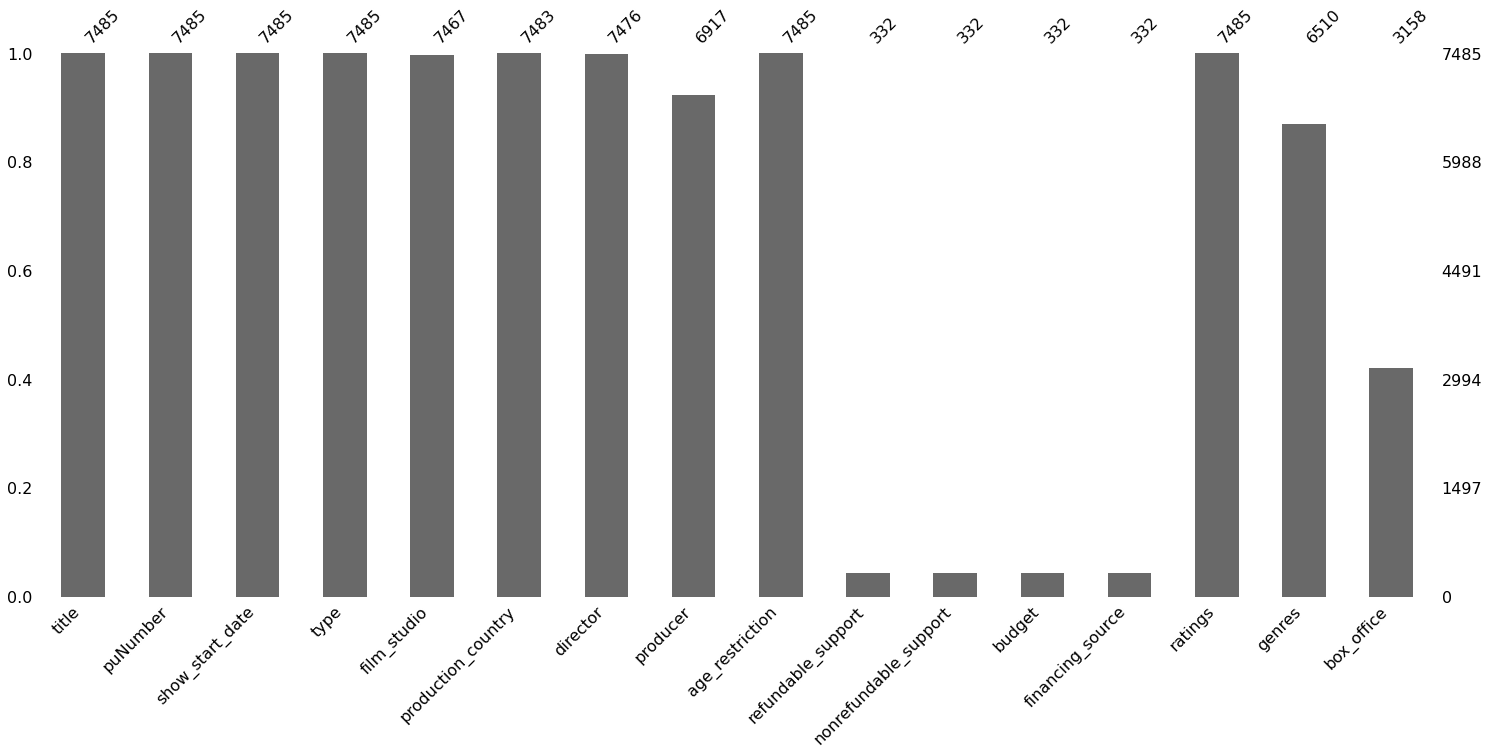

In [93]:
msno.bar(data)

In [94]:
data.loc[data['title'].isna()].count()['title']

0

In [95]:
data.loc[data['puNumber'].isna()].count()['title']

0

In [96]:
data.loc[data['show_start_date'].isna()].count()['title']

0

In [97]:
data.loc[data['type'].isna()].count()['title']

0

In [98]:
data.loc[data['financing_source'].isna()].count()['title']

7153

In [99]:
data.loc[data['film_studio'].isna()].count()['title']

18

In [100]:
data['film_studio'] = data['film_studio'].fillna(value='unknown')

In [101]:
data.loc[data['film_studio'].isna()].count()['title']

0

In [102]:
data.loc[data['production_country'].isna()].count()['title']

2

In [103]:
data['production_country'] = data['production_country'].fillna(value='unknown')

In [104]:
data.loc[data['production_country'].isna()].count()['title']

0

In [105]:
data.loc[data['financing_source'].isna()].count()['title']

7153

In [106]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [107]:
data['financing_source'] = data['financing_source'].fillna(value='Частное')

In [108]:
data.loc[data['financing_source'].isna()].count()['title']

0

In [109]:
data.loc[data['genres'].isna()].count()['title']

975

In [110]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [111]:
data['genres'] = data['genres'].fillna(value='unknown')

In [112]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'unknown', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

In [113]:
data['director'].isna().sum()

9

In [114]:
data['producer'].isna().sum()

568

In [115]:
data = data.dropna(subset=['producer'])

In [116]:
data['producer'].isna().sum()

0

In [117]:
data = data.dropna(subset=['director'])

In [118]:
data['director'].isna().sum()

0

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6912 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6912 non-null   object             
 1   puNumber               6912 non-null   int64              
 2   show_start_date        6912 non-null   datetime64[ns, UTC]
 3   type                   6912 non-null   object             
 4   film_studio            6912 non-null   object             
 5   production_country     6912 non-null   object             
 6   director               6912 non-null   object             
 7   producer               6912 non-null   object             
 8   age_restriction        6912 non-null   object             
 9   refundable_support     330 non-null    float64            
 10  nonrefundable_support  330 non-null    float64            
 11  budget                 330 non-null    float64          

In [120]:
data.loc[data['refundable_support'].isna()].count()['title']

6582

In [121]:
data['refundable_support'] = data['refundable_support'].fillna(value=0)

In [122]:
data.loc[data['refundable_support'].isna()].count()['title']

0

In [123]:
data.loc[data['nonrefundable_support'].isna()].count()['title']

6582

In [124]:
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(value=0)

In [125]:
data.loc[data['nonrefundable_support'].isna()].count()['title']

0

In [126]:
data.loc[data['budget'].isna()].count()['title']

6582

In [127]:
data['budget'] = data['budget'].fillna(value=0)

In [128]:
data.loc[data['budget'].isna()].count()['title']

0

In [129]:
data.loc[data['box_office'].isna()].count()['title']

3871

In [130]:
data['box_office'] = data['box_office'].fillna(value=0)

In [131]:
data.loc[data['box_office'].isna()].count()['title']

0

Были найдены и заполнены пропуски в полях - _film_studio, production_country, financing_source, genres, refundable_support, nonrefundable_support, budget, box_office_. Поля с типом строк были заполнены значением 'unknown', а поля с численными типами были заполнены значением 0(так как если они были, то составляли большую часть от всех данных).
Также были удалены пропуски из полей - _director, producer_, так как они составляют малую долю от всех данных.

Причины появления пропусков: поле producer, director и production_country, genres могли попросту забыть заполнить при заполнении данных(человеческий фактор), либо где-то они были некорректно преобразованы из байт в строку и обратно, в ходе обработки, в связи с чем не записаны в БД.
Поля refundable_support, nonrefundable_support являются поддержкой от государства, а так как в выборке большая часть данных - это частные фильмы, то вполне логичен пропуск в этих полях.
Поле budget могли не заполнить в связи с человеческим фактором(при ручном добавлении бюджета, человек забыл заполнить поле, возможно оно не проверялось как обязательное) или, так как поле представляет с собой денежный тип, а с ним очень тяжело работать из-за артефактов при преобразовании из/во float, где то могла быть выполнена неудачная конвертация числа с плавающей точкой(техническая причина).
box_office были взяты при присоединении второй таблицы, которая представляет собой показы в кинотеатрах и отсносится только к ним. Так как в первой таблицы был прокат, то при присоединении это поле автоматически заполнилось пустым значением.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [63]:
data.duplicated().sum()

0

In [305]:
data.loc[data['puNumber'].duplicated()].count()['title']

2

In [306]:
data = data.drop(data.loc[data['puNumber'].duplicated()].index)
data.loc[data['puNumber'].duplicated()].count()['title']

0

    Явных дубликатов найдено не было.
    Поле _puNumber_ принято уникальным, так как является удостоверением кино и не может повторяться. По этому полю было найдено 2 дубликата и принято их удалить, так как 2 значения никак не повлияют на дальнейший анализ данных.

    Остальные поля не были рассмотрены как неявные дубликаты, так как они могут повторяться и это будет релевантно в случае, если у них разные номера puNumber. К примеру, если встретились два одинаковых фильма, но с разными удостоверениями, то они могли выдаваться для показа в кинотеатрах и на продажу или кинопрокат в онлайн сервисах и на какой либо частный показ.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.


In [132]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [133]:
data['type'].str.strip().unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [134]:
data['type'] = data['type'].str.strip()

In [135]:
print("WITHOUT strip: ", len(data['genres'].unique()))
print("WITH strip: ", len(data['genres'].str.strip().unique()))

WITHOUT strip:  720
WITH strip:  720


In [136]:
print("WITHOUT strip: ", len(data['production_country'].unique()))
print("WITH strip: ", len(data['production_country'].str.strip().unique()))
data['production_country'] = data['production_country'].str.strip()

WITHOUT strip:  909
WITH strip:  901


In [137]:
data.loc[data['financing_source'] == 'Министерство культуры, Фонд кино'].count()

title                    22
puNumber                 22
show_start_date          22
type                     22
film_studio              22
production_country       22
director                 22
producer                 22
age_restriction          22
refundable_support       22
nonrefundable_support    22
budget                   22
financing_source         22
ratings                  22
genres                   22
box_office               22
dtype: int64

In [138]:
data = data.drop(data.loc[data['financing_source'] == 'Министерство культуры, Фонд кино'].index)
data['financing_source'].unique()

array(['Частное', 'Министерство культуры', 'Фонд кино'], dtype=object)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6890 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6890 non-null   object             
 1   puNumber               6890 non-null   int64              
 2   show_start_date        6890 non-null   datetime64[ns, UTC]
 3   type                   6890 non-null   object             
 4   film_studio            6890 non-null   object             
 5   production_country     6890 non-null   object             
 6   director               6890 non-null   object             
 7   producer               6890 non-null   object             
 8   age_restriction        6890 non-null   object             
 9   refundable_support     6890 non-null   float64            
 10  nonrefundable_support  6890 non-null   float64            
 11  budget                 6890 non-null   float64          

Основная проблема в категориальных данных заключалась в лишних пробелах, после удаления которых, данные приводились к нужной категории. Тем не менее было найдено 22 значения поля _financing_source_ со значением **'Министерство культуры, Фонд кино'**. Действительно финансировать фильм могли сразу два ведомства, но для дальнейшего анализа такое количество значений могут только помешать в виде выбросов или прочих аномалий, что спутает выводы. Следовательно такие значения решено было убрать из данных без вреда для общей картины.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

In [140]:
wrong_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
wrong_budget.count()['title']

16

In [141]:
data = data.drop(wrong_budget.index)

In [142]:
data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])].count()['title']

0

В количественных значениях было найдено 16 подозрительных значений, где бюджет фильма был меньше, чем выделенные на него средства, что невозможно. Так как таких строк всего 16, то их можно безболезненно удалить, что и было предпринято.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [143]:
data['show_start_year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [144]:
def add_string_info(data):
    data = data.replace(';', ',')
    return data.split(',')[0]


data['main_director'] = data['director'].apply(add_string_info)

In [145]:
data['main_genre'] = data['genres'].apply(add_string_info)

In [146]:
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,Частное,7.2,"боевик,драма,мелодрама",0.0,2015,Кевин Костнер,боевик
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,Частное,6.8,"фантастика,боевик,триллер",0.0,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,Частное,6.8,"фантастика,боевик,триллер",0.0,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,Частное,6.8,"фантастика,боевик,триллер",0.0,2015,Тимур Бекмамбетов,фантастика
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,0.0,0.0,0.0,Частное,6.6,"мюзикл,мелодрама,комедия",0.0,2014,Джон Туртурро,мюзикл


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [147]:
data['support'] = round(((data['refundable_support'] + data['nonrefundable_support']) / data['budget']) * 100, 2).fillna(value=0)
data.query('support > 0').head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,0.0,unknown,28140.0,2014,А.Якимчук,unknown,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,62.48


Было добавлено 3 новых поля - _main_director, main_genre, support_

**Вывод:** 
    
   - Были найдены поля для приведения к типу даты - show_start_date. Для приведения к типу float - ratings. Также, так как рейтинг фильмов принято рассчитывать от 0 до 10, то поля с показателями выше были преобразованы.
   - Были найдены и заполнены пропуски в полях - _film_studio, production_country, financing_source, genres, refundable_support, nonrefundable_support, budget, box_office_. Поля с типом строк были заполнены значением 'unknown', а поля с численными типами были заполнены значением 0(так как если они были, то составляли большую часть от всех данных). Также были удалены пропуски из полей - _director, producer_, так как они составляют малую долю от всех данных.
   - Явных дубликатов найдено не было. Поле _puNumber_ принято уникальным, так как является удостоверением кино и не может повторяться. По этому полю было найдено 2 дубликата и принято их удалить, так как 2 значения никак не повлияют на дальнейший анализ данных.
   - Основная проблема в категориальных данных заключалась в лишних пробелах, после удаления которых, данные приводились к нужной категории. Тем не менее было найдено 22 значения поля _financing_source_ со значением **'Министерство культуры, Фонд кино'**. Действительно финансировать фильм могли сразу два ведомства, но для дальнейшего анализа такое количество значений могут только помешать в виде выбросов или прочих аномалий, что спутает выводы. Следовательно такие значения решено было убрать из данных без вреда для общей картины.
   - В количественных значениях было найдено 16 подозрительных значений, где бюджет фильма был меньше, чем выделенные на него средства, что невозможно. Так как таких строк всего 16, то их можно безболезненно удалить, что и было предпринято.
   
    И были добавлены новые поля:
   - show_start_year - с информацией о годе проката
   - main_director - с именем и фамилией главного режиссёра
   - main_genre - с основным жанром фильма
   - support - какую долю от общего бюджета фильма составляет государственная поддержка

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

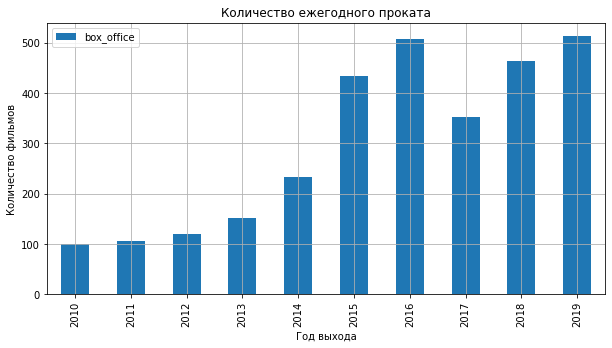

In [149]:
data.query('box_office > 0').pivot_table(index='show_start_year', values='box_office', aggfunc=['count']).plot(kind='bar', y='count', figsize=(10, 5), grid=True)
plt.title('Количество ежегодного проката')
plt.ylabel('Количество фильмов')
plt.xlabel('Год выхода')
plt.show()

In [150]:
round(data.query('box_office > 0')['box_office'].count() / data['box_office'].count() * 100, 2)

43.4

**Вывод:** Доля фильмов показанных в кинотеатрах составляет 43.41 процентов от общего количества. Начиная с 2014 был заметен рост количества фильмов, которые были показаны в кинотеатре. Больше всего фильмов было показано в 2016 году, затем наблюдается спад и снова плавный рост к 2019му году.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

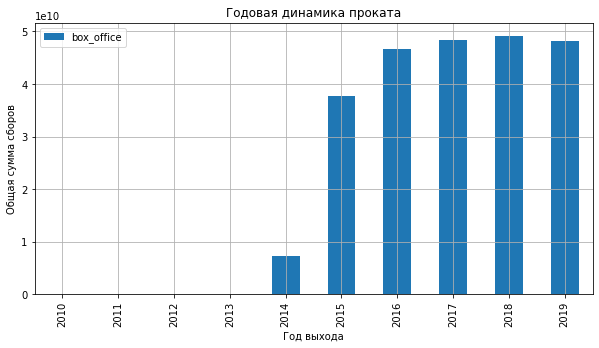

In [151]:
data.query('box_office > 0').pivot_table(index='show_start_year', values='box_office', aggfunc=['sum']).plot(kind='bar', y='sum', figsize=(10, 5), grid=True)
plt.title('Годовая динамика проката')
plt.ylabel('Общая сумма сборов')
plt.xlabel('Год выхода')
plt.show()

**Вывод:** Сумма сборов резко увеличилась начиная с 2015 года. Такой рост можно связать с количеством показанных фильмов. Тем не менее, последующий спад не отразился на сборах. Минимальная сумма сборов была в 2014 году, максимальная в 2018.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [152]:
pivot_table = data.query('box_office > 0').pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median'])
pivot_table.columns = ['Среднее', 'Медиана']
pivot_table

,Среднее,Медиана
show_start_year,,
2010,2.425499e+04,1705.000
2011,1.317376e+05,3000.000
2012,5.745244e+04,6110.000
2013,1.956263e+05,4827.000
2014,3.148501e+07,76360.000
2015,8.701268e+07,5244391.500
2016,9.175475e+07,4002836.250
2017,1.376251e+08,9943877.500
2018,1.060299e+08,8821498.980


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

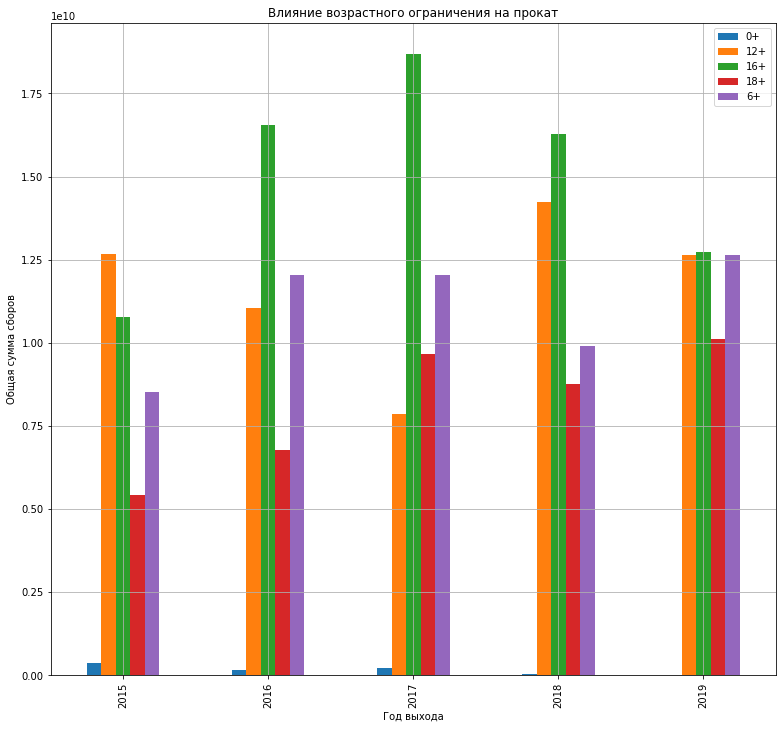

In [153]:
ages_pivot = data.query('box_office > 0 and show_start_year >= 2015').pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc=['sum'])
ages_pivot.columns = ['0+', '12+', '16+', '18+', '6+']
ages_pivot.plot(kind='bar', figsize=(13, 12), grid=True)
plt.title('Влияние возрастного ограничения на прокат')
plt.ylabel('Общая сумма сборов')
plt.xlabel('Год выхода')
plt.show()

In [154]:
pd.options.display.float_format ='{:,.3f}'.format
round(ages_pivot.sum(), 2)

0+       809,073,985.970
12+   58,446,857,225.420
16+   75,029,022,295.860
18+   40,732,563,969.530
6+    55,140,743,120.700
dtype: float64

**Вывод:** В 2015 году наибольшую прибыль показали фильмы с рейтингом 12+. В последующие же 3 года самыми прибыльными являлись фильмы с  рейтингом 16+. Самые низкие показатели у фильмов с рейтингом 0+. В 2019 году картина выровнилась и все рейтинги стали примерно равны, кроме рейтинга 18+. В период с 2016 по 2018 год рейтинг 16+ уверенно держал лидерство по сравнению с другими рейтингами. Наиболее нестабильные показатели у фильмов 12+ из года в год. Возможные причины изменения суммы сборов от года в год - трендовые изменения, либо перенасыщение рынка определенной категорией. Тем не менее фильмы с рейтингом 16+ самый надежный рейтинг для стабильного показа в кино, однако в 2019 году показатели сравнялись. Самый невостребованный показатель у рейтинга 0+, вероятно люди реже ходят в кино с детьми, чем без них и предпочитают показывать такие фильмы детям дома.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [155]:
gov_data = data.query('financing_source != "Частное"')
gov_data.count()['title']

292

In [156]:
gov_data['box_office'].mean()

131150357.53318495

In [157]:
gov_data['box_office'].median()

11480734.55

In [158]:
gov_data['box_office'].sum()

38295904399.69

In [159]:
gov_data['box_office'].min()

0.0

In [160]:
gov_data['box_office'].max()

3073568690.79

Text(0.5, 1.0, 'Гистограмма государственных сборов фильмов')

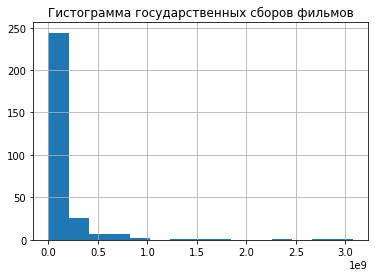

In [164]:
gov_data['box_office'].hist(bins=15)
plt.title('Гистограмма государственных сборов фильмов')

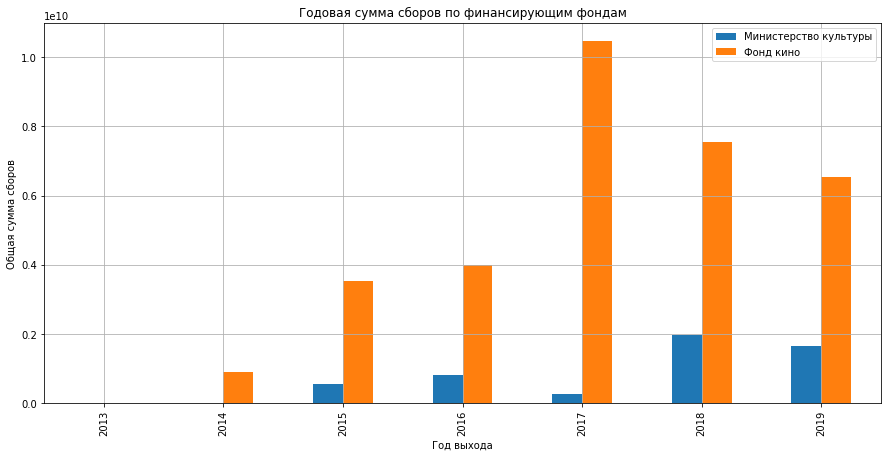

In [165]:
year_pivot = gov_data.pivot_table(index='show_start_year', columns='financing_source', values='box_office', aggfunc=['sum'])
year_pivot.columns = ['Министерство культуры', 'Фонд кино']
year_pivot.plot(kind='bar', figsize=(15, 7), grid=True)
plt.title('Годовая сумма сборов по финансирующим фондам')
plt.ylabel('Общая сумма сборов')
plt.xlabel('Год выхода')
plt.show()

"Фонд кино" ежегодно лидирует по сборам перед "Министерство культуры".

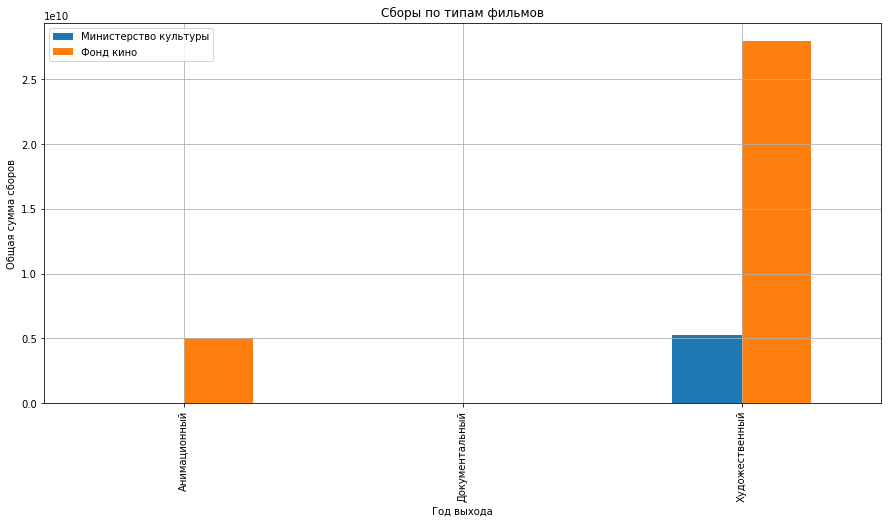

In [167]:
type_pivot = gov_data.pivot_table(index='type', columns='financing_source', values='box_office', aggfunc=['sum'])
type_pivot.columns = ['Министерство культуры', 'Фонд кино']
type_pivot.plot(kind='bar', figsize=(15, 7), grid=True)
plt.title('Сборы по типам фильмов')
plt.ylabel('Общая сумма сборов')
plt.xlabel('Год выхода')
plt.show()

Самые прибыльные типы фильмов для обоих ведомств - "Художественные".

In [168]:
median = gov_data['box_office'].median()
print(gov_data.query('box_office < @median').count()['title'])

146


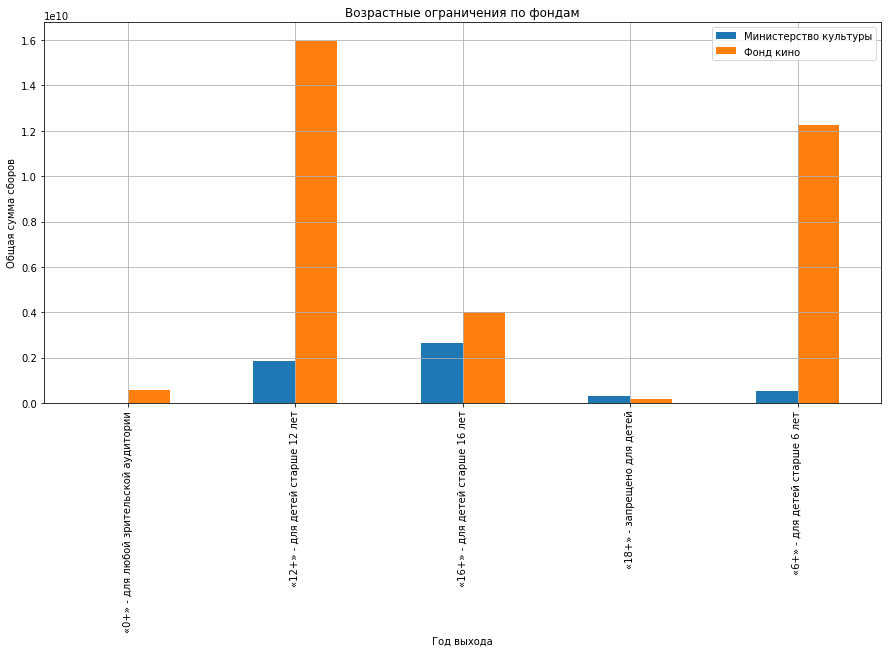

In [169]:
age_pivot = gov_data.pivot_table(index='age_restriction', columns='financing_source', values='box_office', aggfunc=['sum'])
age_pivot.columns = ['Министерство культуры', 'Фонд кино']
age_pivot.plot(kind='bar', figsize=(15, 7), grid=True)
plt.title('Возрастные ограничения по фондам')
plt.ylabel('Общая сумма сборов')
plt.xlabel('Год выхода')
plt.show()

"Фонд кино" имеет лучшие сборы по рейтингу 12+ и 6+, тем временем как "Министерство культуры" имеет лучшие сборы по 16+.

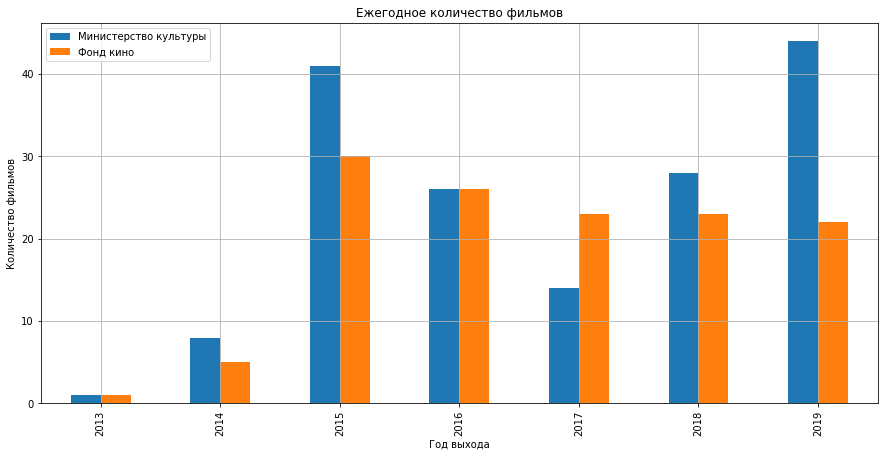

In [170]:
count_pivot = gov_data.pivot_table(index='show_start_year', columns='financing_source', values='box_office', aggfunc=['count'])
count_pivot.columns = ['Министерство культуры', 'Фонд кино']
count_pivot.plot(kind='bar', figsize=(15, 7), grid=True)
plt.title('Ежегодное количество фильмов')
plt.ylabel('Количество фильмов')
plt.xlabel('Год выхода')
plt.show()

По количеству фильмов "Фонд кино" с 2015 года выпускает примерно одинаковое количество фильмов, в то время как "Министерство культуры" выпустило фильмы волнами и наибольшее количество пришлось на 2015 год и 2019.

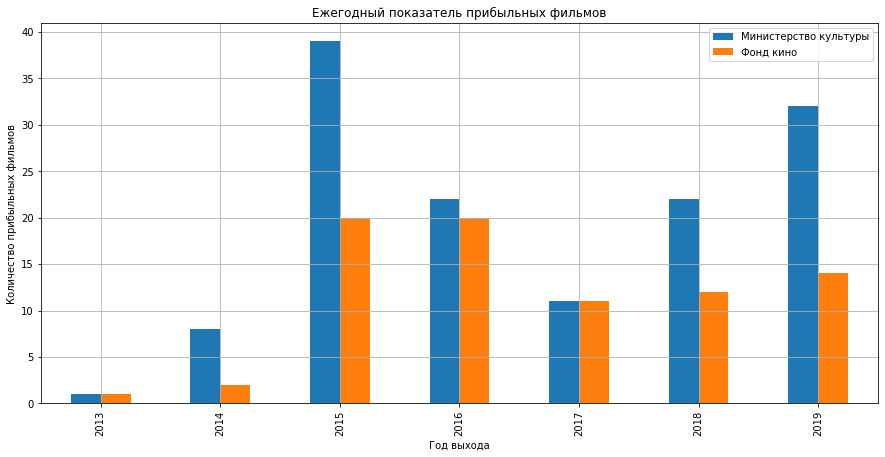

In [171]:
profit_data = (
    gov_data.query('budget > box_office and box_office > 0').
        pivot_table(index='show_start_year', columns='financing_source', values='budget', aggfunc=['count'])
)
profit_data.columns = ['Министерство культуры', 'Фонд кино']
profit_data.plot(kind='bar', figsize=(15, 7), grid=True)
plt.title('Ежегодный показатель прибыльных фильмов')
plt.ylabel('Количество прибыльных фильмов')
plt.xlabel('Год выхода')
plt.show()

"Министерство культуры" имеет больше всего прибыльных фильмов из года в год. В 2015 году был скачок прибыльных фильмов, который связан с увеличенным общим числом.

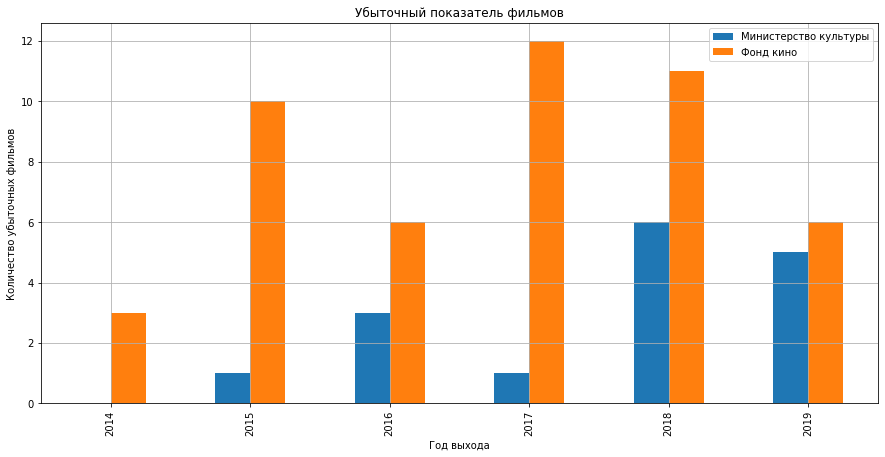

In [172]:
not_profit_data = (
    gov_data.query('budget < box_office and box_office > 0').
        pivot_table(index='show_start_year', columns='financing_source', values='budget', aggfunc=['count'])
)
not_profit_data.columns = ['Министерство культуры', 'Фонд кино']
not_profit_data.plot(kind='bar', figsize=(15, 7), grid=True)
plt.title('Убыточный показатель фильмов')
plt.ylabel('Количество убыточных фильмов')
plt.xlabel('Год выхода')
plt.show()

"Фонд кино" имеет больше убыточных фильмов по сравнению с "Министерство культуры", максимально 12 в 2017 году.

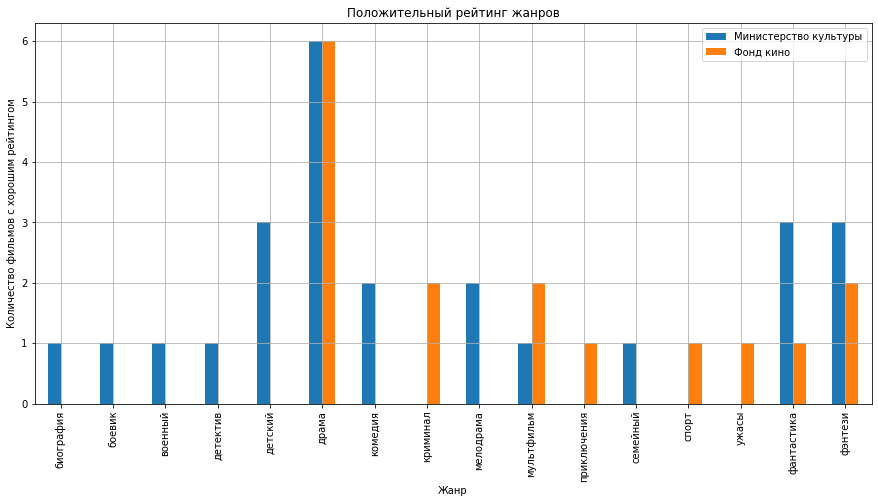

In [173]:
rating_pivot = gov_data.query('ratings > 7').pivot_table(index='main_genre', columns='financing_source', values='ratings', aggfunc=['count'])
rating_pivot.columns = ['Министерство культуры', 'Фонд кино']
rating_pivot.plot(kind='bar', figsize=(15, 7), grid=True)
plt.title('Положительный рейтинг жанров')
plt.ylabel('Количество фильмов с хорошим рейтингом')
plt.xlabel('Жанр')
plt.show()

**Вывод:** 
- По сборам больше всего было фильмов до 250 тысяч, то есть крупные сборы - редкое явление. _"Фонд кино"_ ежегодно лидирует по сборам перед _"Министерство культуры"_. Самые прибыльные типы фильмов для обоих ведомств - _"Художественные"_. 
- _"Фонд кино"_ имеет лучшие сборы по рейтингу 12+ и 6+, тем временем как _"Министерство культуры"_ имеет лучшие сборы по 16+.
- По количеству фильмов "Фонд кино" с 2015 года выпускает примерно одинаковое количество фильмов, в то время как _"Министерство культуры"_ выпустило фильмы волнами и наибольшее количество пришлось на 2015 год и 2019. 
- _"Министерство культуры"_ имеет больше всего прибыльных фильмов из года в год. В 2015 году был скачок прибыльных фильмов, который связан с увеличенным общим числом.
- _"Фонд кино"_ имеет больше убыточных фильмов по сравнению с _"Министерство культуры"_, максимально 12 в 2017 году.
- Оценивая рейтинги, посчитаем, что рейтинг выше 7 является лучшим - самые лучшие фильмы в жанре "драма" для обоих ведомств. Тем не менее _"Министерство культуры"_ успеешнее спонсирует фильмы жанра _"фантастика"_ и _"фэнтези"_. Но мультфильмы лидируют у _"Фонд кино"_.

_Можно сказать, что оба ведомства финансируют, преимущественно, разные фильмы по жанрам и возрастному рейтингу. В разрезе спонсируемых государственными ведомствами фильмов можно сказать, что художественные фильмы являются самыми выгодными для финансирования. Так же ведомство "Министерство культуры" "Фонд кино" по сравнению с "Фонд кино" является наиболее успешным по количеству прибыльных фильмов._

### Шаг 5. Напишите общий вывод

В процессе исследования рынка российского кинопроката были выполнены следующие этапы и сделаны выводы:

**Изучили общую информацию о данных**

    Чтобы объединить таблицы по столбцу puNumber, пришлось привести одну строку к типу numeric(int64) и вторую удалить из-за отсутствия значения(номер удостоверения не может быть пустым) в таблице movies. В таблице shows данных найдено не было. В результате получилась таблица с 7485 записями.

**Выполнена предобработка данных**

   - Были найдены поля для приведения к типу даты - show_start_date. Для приведения к типу float - ratings. Также, так как рейтинг фильмов принято рассчитывать от 0 до 10, то поля с показателями выше были преобразованы.
   - Были найдены и заполнены пропуски в полях - _film_studio, production_country, financing_source, genres, refundable_support, nonrefundable_support, budget, box_office_. Поля с типом строк были заполнены значением 'unknown', а поля с численными типами были заполнены значением 0(так как если они были, то составляли большую часть от всех данных). Также были удалены пропуски из полей - _director, producer_, так как они составляют малую долю от всех данных.
   - Явных дубликатов найдено не было. Поле _puNumber_ принято уникальным, так как является удостоверением кино и не может повторяться. По этому полю было найдено 2 дубликата и принято их удалить, так как 2 значения никак не повлияют на дальнейший анализ данных.
   - Основная проблема в категориальных данных заключалась в лишних пробелах, после удаления которых, данные приводились к нужной категории. Тем не менее было найдено 22 значения поля _financing_source_ со значением **'Министерство культуры, Фонд кино'**. Действительно финансировать фильм могли сразу два ведомства, но для дальнейшего анализа такое количество значений могут только помешать в виде выбросов или прочих аномалий, что спутает выводы. Следовательно такие значения решено было убрать из данных без вреда для общей картины.
   - В количественных значениях было найдено 16 подозрительных значений, где бюджет фильма был меньше, чем выделенные на него средства, что невозможно. Так как таких строк всего 16, то их можно безболезненно удалить, что и было предпринято.
   
**Добавлены новые столбцы в таблицу**

   - show_start_year - с информацией о годе проката
   - main_director - с именем и фамилией главного режиссёра
   - main_genre - с основным жанром фильма
   - support - какую долю от общего бюджета фильма составляет государственная поддержка
 
**Проведен исследовательский анализ данных**

    Сумма сборов резко увеличилась начиная с 2015 года. Такой рост можно связать с количеством показанных фильмов. Тем не менее, последующий спад не отразился на сборах. Минимальная сумма сборов была в 2014 году, максимальная в 2018.
    
    В 2015 году наибольшую прибыль показали фильмы с рейтингом 12+. В последующие же 3 года самыми прибыльными являлись фильмы с рейтингом 16+. Самые низкие показатели у фильмов с рейтингом 0+. В 2019 году картина выровнилась и все рейтинги стали примерно равны, кроме рейтинга 18+. В период с 2016 по 2018 год рейтинг 16+ уверенно держал лидерство по сравнению с другими рейтингами. Наиболее нестабильные показатели у фильмов 12+ из года в год. Возможные причины изменения суммы сборов от года в год - трендовые изменения, либо перенасыщение рынка определенной категорией. Тем не менее фильмы с рейтингом 16+ самый надежный рейтинг для стабильного показа в кино, однако в 2019 году показатели сравнялись. Самый невостребованный показатель у рейтинга 0+, вероятно люди реже ходят в кино с детьми, чем без них и предпочитают показывать такие фильмы детям дома.
    
**Проведен исследовательский анализ данных с государственной поддержкой**

   - По сборам больше всего было фильмов до 250 тысяч, то есть крупные сборы - редкое явление. _"Фонд кино"_ ежегодно лидирует по сборам перед _"Министерство культуры"_. Самые прибыльные типы фильмов для обоих ведомств - _"Художественные"_. 
   - _"Фонд кино"_ имеет лучшие сборы по рейтингу 12+ и 6+, тем временем как _"Министерство культуры"_ имеет лучшие сборы по 16+.
   - По количеству фильмов "Фонд кино" с 2015 года выпускает примерно одинаковое количество фильмов, в то время как _"Министерство культуры"_ выпустило фильмы волнами и наибольшее количество пришлось на 2015 год и 2019. 
   - _"Министерство культуры"_ имеет больше всего прибыльных фильмов из года в год. В 2015 году был скачок прибыльных фильмов, который связан с увеличенным общим числом.
   - _"Фонд кино"_ имеет больше убыточных фильмов по сравнению с _"Министерство культуры"_, максимально 12 в 2017 году.
   - Оценивая рейтинги, посчитаем, что рейтинг выше 7 является лучшим - самые лучшие фильмы в жанре "драма" для обоих ведомств. Тем не менее _"Министерство культуры"_ успеешнее спонсирует фильмы жанра _"фантастика"_ и _"фэнтези"_. Но мультфильмы лидируют у _"Фонд кино"_.

_Можно сказать, что оба ведомства финансируют, преимущественно, разные фильмы по жанрам и возрастному рейтингу. В разрезе спонсируемых государственными ведомствами фильмов можно сказать, что художественные фильмы являются самыми выгодными для финансирования. Так же ведомство "Министерство культуры" "Фонд кино" по сравнению с "Фонд кино" является наиболее успешным по количеству прибыльных фильмов._